In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
from sklearn.metrics import accuracy_score #정확도 계산
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
from tensorflow import keras
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

In [2]:
import pandas as pd
data = pd.read_csv('C:/Users/trxgfcg/OneDrive/바탕 화면/big/Flipkart.csv', encoding='latin1')

data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
#del data['Unnamed: 0']
data['sentiment'] = data['sentiment'].replace(['positive','negative'],[0,1])
data[:5]

,review,sentiment
0,One of the other reviewers has mentioned that ...,0
1,A wonderful little production. <br /><br />The...,0
2,I thought this was a wonderful way to spend ti...,0
3,Basically there's a family where a little boy ...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",0


<Axes: xlabel='sentiment'>

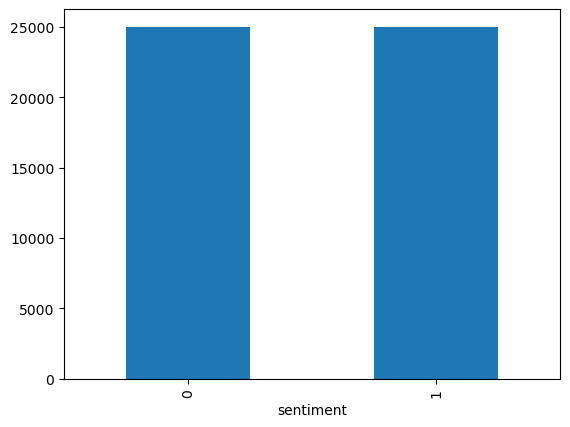

In [4]:
data['sentiment'].value_counts().plot(kind='bar')

In [5]:
import pandas as pd

# label 열의 값이 1인 행의 인덱스를 찾습니다.
indices_to_drop = data[data['sentiment'] == 1].sample(frac=0.45, random_state=42).index

len(indices_to_drop)
# 인덱스를 기반으로 데이터프레임에서 해당 행을 삭제합니다.
data = data.drop(indices_to_drop)

print(data)


                                                  review  sentiment
0      One of the other reviewers has mentioned that ...          0
1      A wonderful little production. <br /><br />The...          0
2      I thought this was a wonderful way to spend ti...          0
4      Petter Mattei's "Love in the Time of Money" is...          0
5      Probably my all-time favorite movie, a story o...          0
...                                                  ...        ...
49993  Robert Colomb has two full-time jobs. He's kno...          1
49994  This is your typical junk comedy.<br /><br />T...          1
49995  I thought this movie did a down right good job...          0
49996  Bad plot, bad dialogue, bad acting, idiotic di...          1
49998  I'm going to have to disagree with the previou...          1

[38750 rows x 2 columns]


In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
#from konlpy.tag import Okt

In [7]:
stop_words_list = stopwords.words('english')
print('불용어 개수 :', len(stop_words_list))
print('불용어 10개 출력 :',stop_words_list[:10])

불용어 개수 : 179
불용어 10개 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [8]:
data['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
4        Petter Mattei's "Love in the Time of Money" is...
5        Probably my all-time favorite movie, a story o...
                               ...                        
49993    Robert Colomb has two full-time jobs. He's kno...
49994    This is your typical junk comedy.<br /><br />T...
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49998    I'm going to have to disagree with the previou...
Name: review, Length: 38750, dtype: object

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

# NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('stopwords')

# 영어 불용어 목록
stop_words = set(stopwords.words('english'))

# 데이터 로드 (예시로 DataFrame을 사용합니다)
# 여기서는 DataFrame의 'text' 열에 텍스트 데이터가 있다고 가정합니다.
# 실제 데이터에 맞게 수정해야 합니다.
# 예시: df = pd.read_csv('your_dataset.csv')
# 데이터프레임의 'text' 열에 텍스트 데이터가 들어있다고 가정
# df['text']에 해당하는 컬럼명을 사용하세요.

# 예시 데이터


# 데이터프레임 생성 (실제 데이터에 맞게 수정해야 함)
df = pd.DataFrame(data, columns=['review'])

# 불용어 제거 함수 정의
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_text = [word for word in tokens if word.lower() not in stop_words]
    return " ".join(filtered_text)

# 각 텍스트에 대해 불용어 제거 적용
df['review'] = df['review'].apply(remove_stopwords)

# 결과 출력
print(df)
data['review'] = df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\trxgfcg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trxgfcg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                  review
0      One reviewers mentioned watching 1 Oz episode ...
1      wonderful little production . < br / > < br / ...
2      thought wonderful way spend time hot summer we...
4      Petter Mattei 's `` Love Time Money '' visuall...
5      Probably all-time favorite movie , story selfl...
...                                                  ...
49993  Robert Colomb two full-time jobs . 's known th...
49994  typical junk comedy. < br / > < br / > almost ...
49995  thought movie right good job . n't creative or...
49996  Bad plot , bad dialogue , bad acting , idiotic...
49998  'm going disagree previous comment side Maltin...

[38750 rows x 1 columns]


In [10]:
data['review'] = df

In [11]:
sentiment_counts = data['sentiment'].value_counts()

# 각 sentiment 값의 개수를 전체 데이터의 개수로 나누어 비율 계산
total_samples = len(data)
sentiment_ratios = sentiment_counts / total_samples

print(sentiment_ratios)

sentiment
0    0.645161
1    0.354839
Name: count, dtype: float64


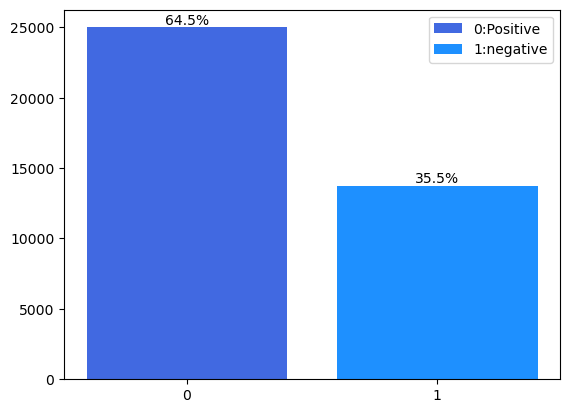

In [12]:
# 막대 그래프 그리기
total_count = data['sentiment'].count()
import matplotlib.pyplot as plt

bars = plt.bar([0, 1], data['sentiment'].value_counts().values, color=['#4169E1', '#1E90FF'])

# x축 눈금과 레이블 설정
plt.xticks([0, 1], ['0', '1'])

# 범례 추가
plt.legend(bars, ['0:Positive', '1:negative'])
for bar in bars:
    height = bar.get_height()
    percentage = height / total_count * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%.1f%%' % percentage, ha='center', va='bottom')

plt.savefig('C:/Users/trxgfcg/OneDrive/바탕 화면/학위논문_배경득/Flipkart_ratio.png')
# 그래프 표시
plt.show()


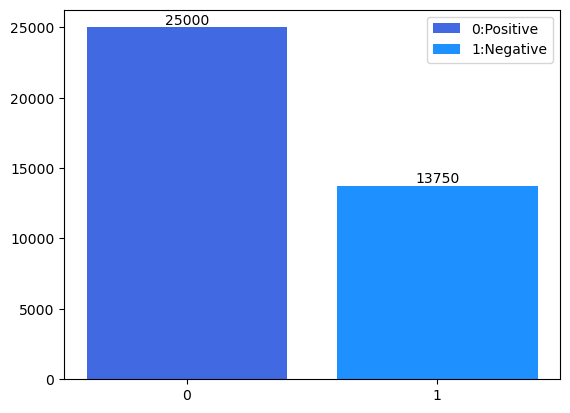

In [13]:
import matplotlib.pyplot as plt

# 데이터프레임에서 'sentiment' 칼럼의 값에 따른 갯수를 세기
sentiment_counts = data['sentiment'].value_counts()

# 전체 데이터 갯수
total_count = sentiment_counts.sum()

# 막대 그래프 그리기
bars = plt.bar([0, 1], sentiment_counts.values, color=['#4169E1', '#1E90FF'])

# x축 눈금과 레이블 설정
plt.xticks([0, 1], ['0', '1'])

# 범례 추가
plt.legend(bars, ['0:Positive', '1:Negative'])

# 각 막대 위에 데이터 갯수 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % height, ha='center', va='bottom')

# 그래프 표시
plt.show()


In [14]:
#data = pd.read_csv('C:/Users/trxgfcg/OneDrive/바탕 화면/big/IMDB.csv', encoding='latin1')


In [15]:
print('v2열의 유니크한 값 :',data['review'].nunique())

v2열의 유니크한 값 : 38612


In [16]:
data.drop_duplicates(subset=['review'], inplace=True)
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 38612


In [17]:

#real = pd.read_csv('C:/Users/trxgfcg/OneDrive/바탕 화면/big/review_realtotal.csv')

In [18]:
#print('v2열의 유니크한 값 :',real['element_text'].nunique())

In [19]:
#real.drop_duplicates(subset=['element_text'], inplace=True)
#print('총 샘플의 수 :',len(real))

In [20]:
X_data = data['review']
y_data = data['sentiment']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))


메일 본문의 개수: 38612
레이블의 개수: 38612


In [21]:
x_train, x_valid, y_train, y_valid= train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [22]:
x_train.fillna('', inplace=True)

In [23]:
dtmvector = CountVectorizer()
X_train_dtm = dtmvector.fit_transform(x_train)
print(X_train_dtm.shape)

(30889, 84571)


In [24]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(X_train_dtm)
print(tfidfv.shape)

(30889, 84571)


In [25]:
mod = MultinomialNB()
orginal = mod.fit(tfidfv, y_train)

In [26]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# 결측치를 빈 문자열로 대체
x_valid.fillna('', inplace=True)

# CountVectorizer로 변환
X_test_dtm = dtmvector.transform(x_valid)
tfidfv_test = tfidf_transformer.transform(X_test_dtm)

predicted = mod.predict(tfidfv_test)  # 테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_valid, predicted)) #예측값과 실제값 비교

정확도: 0.7234235400751003


In [28]:
from sklearn.metrics import f1_score

f1 = f1_score(y_valid, predicted)

print("F1-score:", f1)

F1-score: 0.38408304498269896


In [29]:
original_f1 = f1_score(y_valid, predicted)
print(f"F1-score={original_f1}")

F1-score=0.38408304498269896


In [30]:
df_test = pd.concat([x_valid, y_valid], axis=1)

In [31]:
df_train = pd.concat([x_train, y_train], axis=1)

In [32]:
def print_class_num(df, label_name):            # 이진 클래스의 비율을 알아보기 위한 함수
  n_total = len(df)                             # 데이터의 총 개수
  n_neg = len(df.query(label_name + ' == 1'))   # label로 사용하는 열의 1 개수
  n_pos = len(df.query(label_name + ' == 0'))   # label로 사용하는 열의 0 개수

  print("부정 댓글: {}개, {:.2f}%".format(n_neg, n_neg*100/n_total))
  print("긍정 댓글: {}개, {:.2f}%\n".format(n_pos, n_pos*100/n_total))

  values = df[label_name].value_counts()        # label로 사용하는 열의 값을 카운트
  values.plot(kind='bar')
  print(values)

In [33]:
df_test

,review,sentiment
45112,"Firstly , heard great things film , least amon...",0
36926,really tried like movie end n't work . seen Ki...,1
40907,think great funny movie . story funny . daught...,0
42992,"Everything `` Choose Connor '' top=drawer , es...",0
7316,Ted 's Bodacious journey existential trip them...,0
...,...,...
38913,"Human Traffic purely ` , done ' experience Â ...",1
46885,Emraan Hashmi post MURDER good roles Bhatt fil...,1
31828,film started cinematic love affair < br / > < ...,0
49901,program lot fun title song catchy ca n't get h...,0


In [34]:
from imblearn.over_sampling import ADASYN
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

Amodels = []
f1_scores_A = [] 
# 테스트 데이터를 TF-IDF로 변환
X_test_dtm = dtmvector.transform(x_valid)
tfidfv_test = tfidf_transformer.transform(X_test_dtm)

# ADASYN을 사용하여 오버샘플링하고 정확도 측정
for i in range(7, 11):
    # ADASYN을 사용하여 오버샘플링
    adasyn = ADASYN(sampling_strategy=i/10)
    X_train_adasyn, y_train_adasyn = adasyn.fit_resample(tfidfv, y_train)

    # 모델 학습
    mod = MultinomialNB()
    mod.fit(X_train_adasyn, y_train_adasyn)
    
    #모델추가
    Amodels.append(mod)

    # 예측
    predicted = mod.predict(tfidfv_test)

    # F1-score 출력
    f1 = f1_score(y_valid, predicted)
    f1_scores_A.append(f1)
    print(f"sampling_strategy={i/10}: F1-score={f1}")


sampling_strategy=0.7: F1-score=0.4808211777417612
sampling_strategy=0.8: F1-score=0.7716405605935696
sampling_strategy=0.9: F1-score=0.8166877370417194
sampling_strategy=1.0: F1-score=0.8193909695484773


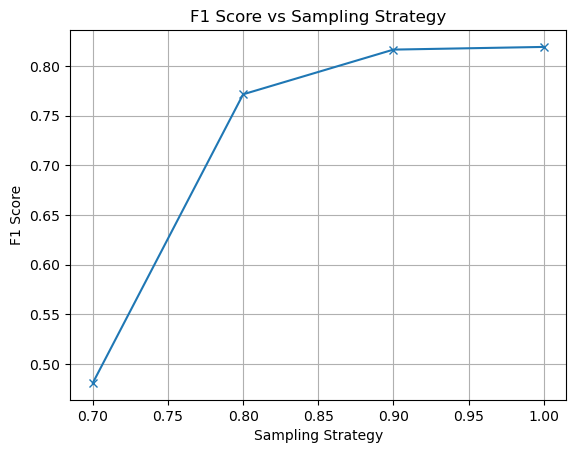

In [35]:
import matplotlib.pyplot as plt

sampling_strategies = [i/10 for i in range(7, 11)]
plt.plot(sampling_strategies, f1_scores_A, marker='x')
#plt.plot(sampling_strategies, f1_scores_B, marker='x')
#plt.plot(sampling_strategies, f1_scores_S, marker='x')

#plt.plot(sampling_strategies, f1_scores_A, marker='o')
plt.title('F1 Score vs Sampling Strategy')
plt.xlabel('Sampling Strategy')
plt.ylabel('F1 Score')
plt.grid(True)
#plt.ylim(0.91, 0.96)

plt.show()


In [36]:
from imblearn.over_sampling import ADASYN
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

f1_scores_S = [] 
# 테스트 데이터를 TF-IDF로 변환
X_test_dtm = dtmvector.transform(x_valid)
tfidfv_test = tfidf_transformer.transform(X_test_dtm)

Smodels = []

# ADASYN을 사용하여 오버샘플링하고 정확도 측정
for i in range(7, 11):
    # ADASYN을 사용하여 오버샘플링
    smote = SMOTE(sampling_strategy=i/10)
    X_train_smote, y_train_smote = smote.fit_resample(tfidfv, y_train)

    # 모델 학습
    mod = MultinomialNB()
    mod.fit(X_train_smote, y_train_smote)
    # 생성된 모델을 리스트에 추가
    Smodels.append(mod)

    # 예측
    predicted = mod.predict(tfidfv_test)


   # F1-score 출력
    f1 = f1_score(y_valid, predicted)
    f1_scores_S.append(f1)
    print(f"sampling_strategy={i/10}: F1-score={f1}")


sampling_strategy=0.7: F1-score=0.7056705670567057
sampling_strategy=0.8: F1-score=0.7818731117824773
sampling_strategy=0.9: F1-score=0.8122464035411288
sampling_strategy=1.0: F1-score=0.8126070572113737


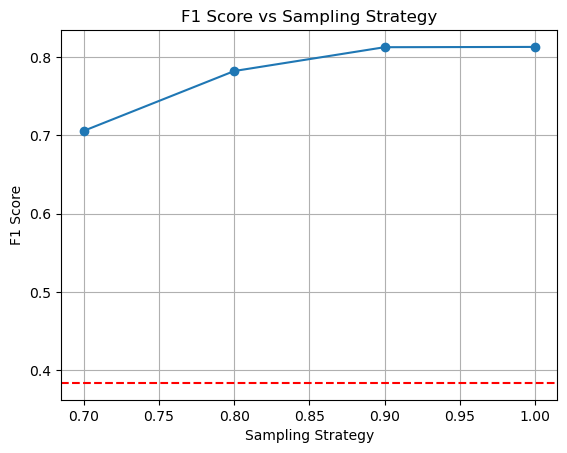

In [37]:
import matplotlib.pyplot as plt

sampling_strategies = [i/10 for i in range(7, 11)]

plt.plot(sampling_strategies, f1_scores_S, marker='o')
plt.title('F1 Score vs Sampling Strategy')
plt.xlabel('Sampling Strategy')
plt.ylabel('F1 Score')
plt.grid(True)

#plt.ylim(0.9, 0.96)
plt.axhline(y=original_f1, color='r', linestyle='--')

plt.show()


In [38]:
from imblearn.over_sampling import ADASYN
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
f1_scores_B = [] 
Bmodels = [] 

# 테스트 데이터를 TF-IDF로 변환
X_test_dtm = dtmvector.transform(x_valid)
tfidfv_test = tfidf_transformer.transform(X_test_dtm)

# ADASYN을 사용하여 오버샘플링하고 정확도 측정
for i in range(7, 11):
    # ADASYN을 사용하여 오버샘플링
    Bsmote = BorderlineSMOTE(sampling_strategy=i/10)
    X_train_B, y_train_B = Bsmote.fit_resample(tfidfv, y_train)

    # 모델 학습
    mod = MultinomialNB()
    mod.fit(X_train_B, y_train_B)
    # 생성된 모델을 리스트에 추가
    Bmodels.append(mod)

    # 예측
    predicted = mod.predict(tfidfv_test)

    # F1-score 출력
    f1 = f1_score(y_valid, predicted)
    f1_scores_B.append(f1)
    print(f"sampling_strategy={i/10}: F1-score={f1}")


sampling_strategy=0.7: F1-score=0.7030439684329199
sampling_strategy=0.8: F1-score=0.7840451248992748
sampling_strategy=0.9: F1-score=0.8209366391184574
sampling_strategy=1.0: F1-score=0.8165199729180771


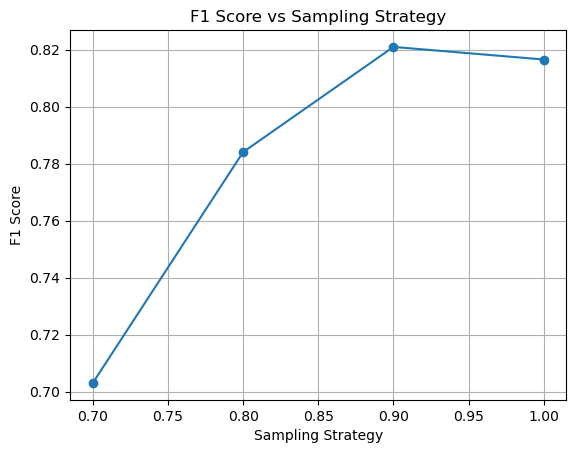

In [39]:
import matplotlib.pyplot as plt

sampling_strategies = [i/10 for i in range(7, 11)]

plt.plot(sampling_strategies, f1_scores_B, marker='o')
plt.title('F1 Score vs Sampling Strategy')
plt.xlabel('Sampling Strategy')
plt.ylabel('F1 Score')
plt.grid(True)

#plt.ylim(0.9, 0.96)
#plt.axhline(y=original_f1, color='r', linestyle='--')

plt.show()


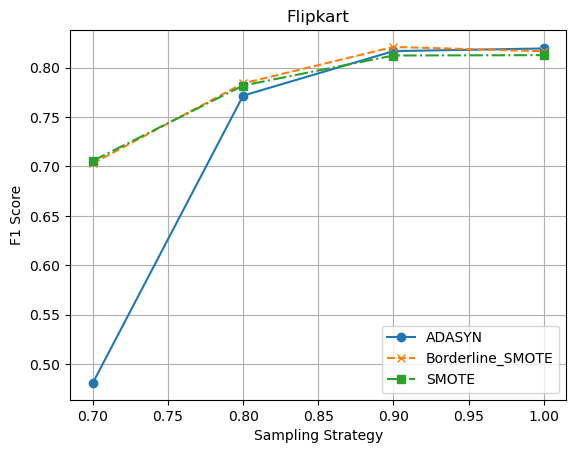

In [55]:
import matplotlib.pyplot as plt

sampling_strategies = [i/10 for i in range(7, 11)]

plt.plot(sampling_strategies, f1_scores_A, marker='o', linestyle='-', label='ADASYN')
plt.plot(sampling_strategies, f1_scores_B, marker='x', linestyle='--', label='Borderline_SMOTE')
plt.plot(sampling_strategies, f1_scores_S, marker='s', linestyle='-.', label='SMOTE')

#plt.plot(sampling_strategies, f1_scores_A, marker='o')
plt.title('Flipkart')
plt.xlabel('Sampling Strategy')
plt.ylabel('F1 Score')
plt.grid(True)
#plt.ylim(0.91, 0.96)
#plt.axhline(y=original_f1, color='r', linestyle='--')
#plt.text(0.75, 0.27, 'Original F1-score'+str(round(original_f1,3)), color='red', fontsize=11)
plt.legend()
plt.savefig('C:/Users/trxgfcg/OneDrive/바탕 화면/학위논문_배경득/Flipkart_result_no.png')

plt.show()


In [41]:
import pandas as pd
data = pd.read_csv('C:/Users/trxgfcg/OneDrive/바탕 화면/big/Flipkart.csv', encoding='latin1')

data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [42]:
#del data['Unnamed: 0']
data['sentiment'] = data['sentiment'].replace(['positive','negative'],[0,1])
data[:5]

,review,sentiment
0,One of the other reviewers has mentioned that ...,0
1,A wonderful little production. <br /><br />The...,0
2,I thought this was a wonderful way to spend ti...,0
3,Basically there's a family where a little boy ...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",0


In [43]:
X_data = data['review']
y_data = data['sentiment']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))


메일 본문의 개수: 50000
레이블의 개수: 50000


In [44]:
x_train, x_valid, y_train, y_valid= train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [45]:
x_train.fillna('', inplace=True)

In [46]:
dtmvector = CountVectorizer()
X_train_dtm = dtmvector.fit_transform(x_train)
print(X_train_dtm.shape)

(40000, 94062)


In [47]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(X_train_dtm)
print(tfidfv.shape)

(40000, 94062)


In [48]:
mod = MultinomialNB()
orginal = mod.fit(tfidfv, y_train)

In [49]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [50]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# 결측치를 빈 문자열로 대체
x_valid.fillna('', inplace=True)

# CountVectorizer로 변환
X_test_dtm = dtmvector.transform(x_valid)
tfidfv_test = tfidf_transformer.transform(X_test_dtm)

predicted = mod.predict(tfidfv_test)  # 테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_valid, predicted)) #예측값과 실제값 비교

정확도: 0.8649


In [51]:
from sklearn.metrics import f1_score

f1 = f1_score(y_valid, predicted)

print("F1-score:", f1)

F1-score: 0.8672496806524518
